# CO2 Emissions Prediction & Time Series Forecasting

# Import Libraries

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
from sklearn.model_selection import train_test_split
import datetime
from pandas.tseries.offsets import DateOffset
from statsmodels.tsa.arima.model import ARIMA
import statsmodels.api as sm
from statsmodels.tsa.ar_model import AutoReg
import pmdarima as pm
import pickle
import warnings
warnings.filterwarnings('ignore')

# Reading dataset

In [2]:
df = pd.read_csv("total_data_Filter.csv")
df

,Year,Jordan,South,North,Middle,Aqaba,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,Population,CO2 per year
0,1950,18.15,17.75,18.15,17.99,18.97,6.75,8.40,12.62,19.03,21.18,24.05,27.04,27.24,24.48,19.50,14.88,12.01,438386,172208
1,1951,19.13,18.69,19.16,19.01,19.66,9.86,10.95,15.60,18.96,23.23,25.18,27.55,27.86,25.61,20.39,14.89,8.96,469962,161216
2,1952,19.20,18.79,19.18,19.09,19.85,9.21,11.01,12.71,17.97,22.06,24.86,26.49,28.21,27.52,22.37,15.05,12.75,504576,194192
3,1953,18.27,17.91,18.18,18.07,18.87,9.50,11.39,10.93,17.42,22.13,25.02,27.83,27.38,24.55,21.57,12.99,8.12,541616,212512
4,1954,18.93,18.49,18.95,18.77,19.42,8.29,10.47,14.78,16.25,22.81,24.88,27.93,28.42,25.01,21.30,15.67,10.73,580796,252549
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66,2016,20.07,19.66,20.03,19.90,20.88,8.62,13.07,15.62,21.00,23.32,27.55,28.85,29.22,26.03,22.33,15.93,9.22,9964656,24345622
67,2017,19.83,19.36,19.79,19.65,20.53,8.46,9.58,14.53,19.24,23.48,26.76,29.49,29.07,26.93,20.97,15.57,13.13,10215381,25561278
68,2018,20.44,19.98,20.41,20.26,21.18,9.94,13.43,17.39,19.79,24.53,26.72,28.59,28.33,26.92,22.19,15.65,11.35,10459865,25259630
69,2019,19.89,19.42,19.86,19.71,20.62,9.09,11.07,13.14,17.34,24.83,27.53,28.65,28.44,26.60,22.90,17.00,11.53,10698683,25744983


### Find the correlation between the features

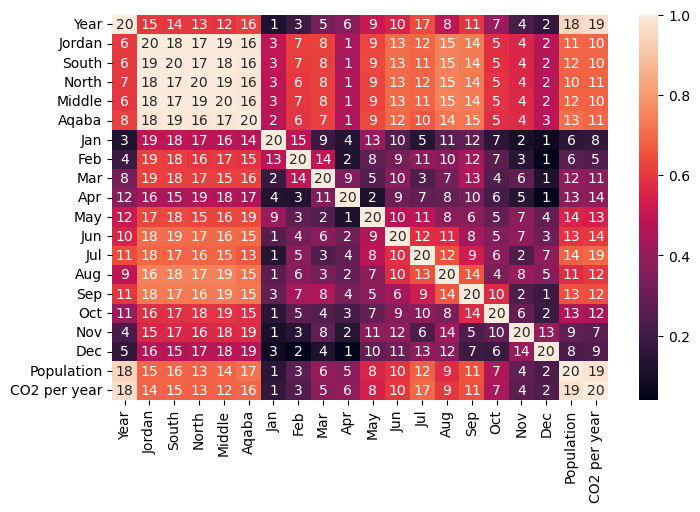

In [3]:
corr = df.corr()
fig, hm = plt.subplots(figsize=(8,5))
hm = sns.heatmap(corr,annot=corr.rank(axis="columns"), xticklabels=corr.columns,yticklabels=corr.columns)

# Machine learning models

## A) Prediction:

### Train-Test Splitting

In [4]:
X = df.drop('CO2 per year',axis=1)
y = df['CO2 per year']
X_train,X_test,y_train,y_test=train_test_split(X ,y, test_size=0.2 ,random_state=0)

In [5]:
X_train.shape

(56, 19)

In [6]:
X_test.shape

(15, 19)

In [7]:
#Build a function to evaluate the model:
def Get_Evaluation(t, p):

    r2_scoren= r2_score(t, p)
    rmse=mean_squared_error(t, p, squared=False)
    mae=mean_absolute_error(t, p)
    total ={'r2_score':round(r2_scoren,3),'rmse': round(rmse,3),'mae':round(rmse,3)}
    return print (total)

In [8]:
#Build a function to fit, predict, and evaluate the model:
def Pred_model (model):    
              model=model
              model.fit(X_train,y_train)
              y_pred = model.predict(X_test)
              m = print('The model is',str(model).replace("()"," "))
              r2_scoren= r2_score(y_test,y_pred)
              rmse=mean_squared_error(y_test, y_pred, squared=False)
              mae =mean_absolute_error(y_test, y_pred)
              total={'r2_score':round(r2_scoren,3),'rmse': round(rmse,3),'mae':round(rmse,3)}
              plt.scatter(y_test, y_pred)
              plt.xlabel('Test')
              plt.ylabel('Predict')
              out = print (m, total,
                            plt.show())   

              return out

## A.1) Linear Regression model

The model is LinearRegression 


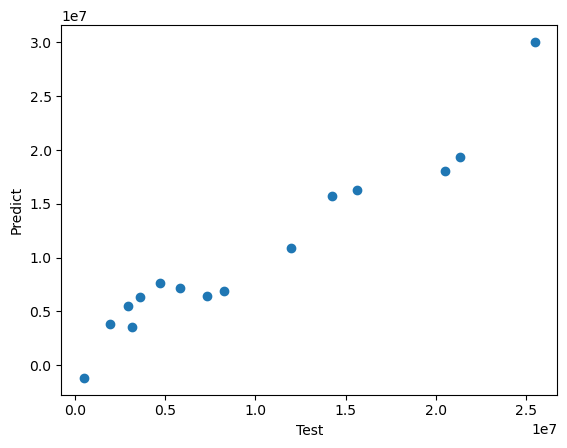

None {'r2_score': 0.923, 'rmse': 2122199.37, 'mae': 2122199.37} None


In [9]:
model1= Pred_model (LinearRegression())

## A.2) Lasso Regression model

The model is Lasso 


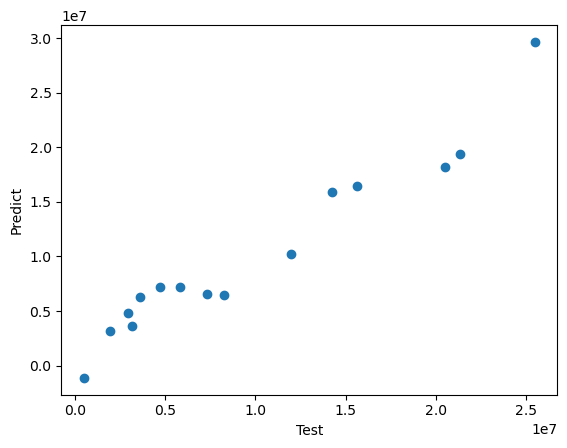

None {'r2_score': 0.932, 'rmse': 1999877.904, 'mae': 1999877.904} None


In [10]:
model2 = Pred_model(Lasso())

## A.3) Ridge Regression model

The model is Ridge 


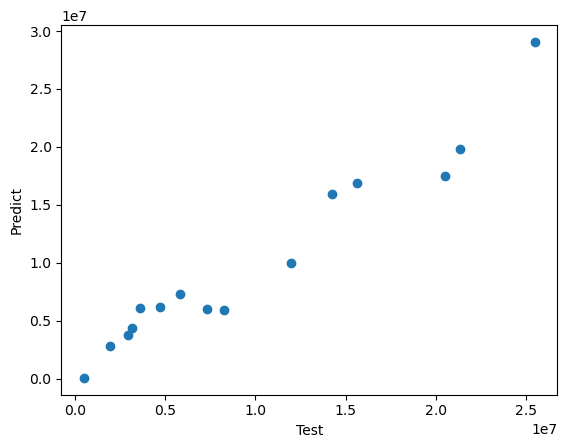

None {'r2_score': 0.939, 'rmse': 1893383.939, 'mae': 1893383.939} None


In [11]:
model3 = Pred_model(Ridge())

## A.4) Decision Tree model

{'r2_score': 0.94, 'rmse': 1872368.979, 'mae': 1872368.979}


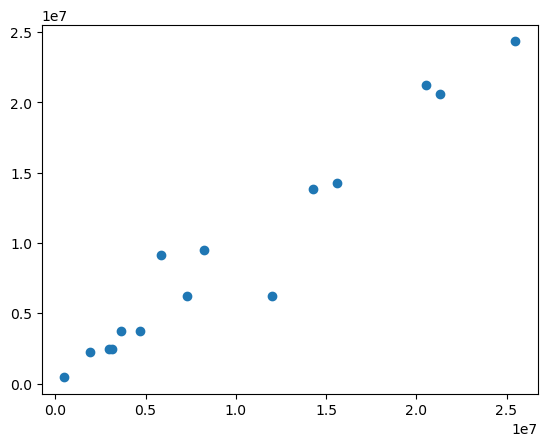

In [12]:
model4 =(DecisionTreeRegressor(random_state=0)).fit(X_train, y_train)
y_pred = model4.predict(X_test)
Get_Evaluation(y_test, y_pred)
plt.scatter(y_test, y_pred)

{'r2_score': 0.98, 'rmse': 1091038.225, 'mae': 1091038.225}


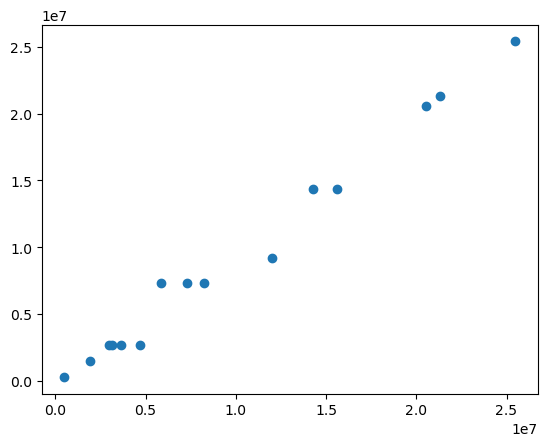

In [13]:
#Find the optimal parameters to increase accuracy by Grid Search
params = {'max_depth': [2, 4, 6, 8],
              'min_samples_split': [2, 4, 6,8],
              'min_samples_leaf': [1, 2, 3 ,4]}
Gs = GridSearchCV(estimator=model4, param_grid=params, cv=5).fit(X_train, y_train)
model4_opt = DecisionTreeRegressor(**Gs.best_params_,random_state=0).fit(X_train, y_train)
y_pred = model4_opt.predict(X_test)
Get_Evaluation(y_test, y_pred)
plt.scatter(y_test, y_pred)

### The model was selected based on the higher accuracy and has a minimum Error, thus the "Decision Tree model" is the most optimal model for prediction

## B) Forecasting:

### Dataset preparation and convert it to Time-series data frame

In [14]:
df2 = df[['Year','CO2 per year']]
df2

,Year,CO2 per year
0,1950,172208
1,1951,161216
2,1952,194192
3,1953,212512
4,1954,252549
...,...,...
66,2016,24345622
67,2017,25561278
68,2018,25259630
69,2019,25744983


In [15]:
Time_trans = lambda x: pd.to_datetime(x, format='%Y', errors = 'coerce')
df2= pd.read_csv('total_data_Filter.csv', parse_dates=['Year'], index_col='Year', date_parser=Time_trans)
df_Forcast = df2[['CO2 per year']]
df_Forcast

,CO2 per year
Year,
1950-01-01,172208
1951-01-01,161216
1952-01-01,194192
1953-01-01,212512
1954-01-01,252549
...,...
2016-01-01,24345622
2017-01-01,25561278
2018-01-01,25259630


### Train-Test Spliting for Time-series forcasting

In [16]:
Train_data = df_Forcast[:-20]
Test_data = df_Forcast[-20:]

In [17]:
Train_data.shape

(51, 1)

In [18]:
Test_data.shape

(20, 1)

### Plot Train_data and Test_data

Text(0.5, 1.0, 'CO2 emisions per year')

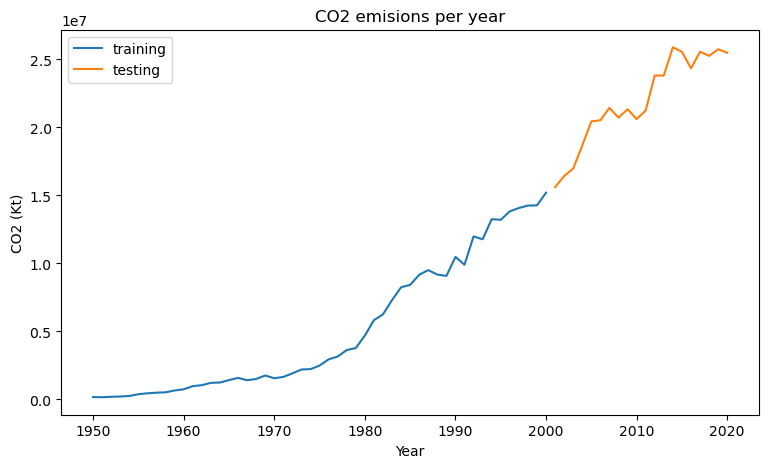

In [19]:
plt.figure(figsize=(9,5), dpi=100)
plt.plot(Train_data, label='training')
plt.plot(Test_data, label='testing')
plt.xlabel('Year')
plt.ylabel('CO2 (Kt)')
plt.legend()
plt.title('CO2 emisions per year')

In [20]:
#Build a function to Plot Training, Testing, Forcasting data
def plt_pred(y_pred,model):
    plt.figure(figsize=(9,5))
    plt.plot(Train_data, label='Training')
    plt.plot(Test_data, label='Testing')
    plt.plot(y_pred, label='Forcasting')
    plt.title(f'Forcast vs Test for {str(model).replace("()"," ")} model')
    plt.xlabel('Year')
    plt.ylabel('CO2 (Kt)')
    plt.legend(loc='upper left', fontsize=8)
    plt.show()

## B.1) Auto ARIMA model

Performing stepwise search to minimize aic
 ARIMA(1,2,1)(0,1,1)[12]             : AIC=1085.511, Time=0.04 sec
 ARIMA(0,2,0)(0,1,0)[12]             : AIC=1126.356, Time=0.02 sec
 ARIMA(1,2,0)(1,1,0)[12]             : AIC=inf, Time=0.04 sec
 ARIMA(0,2,1)(0,1,1)[12]             : AIC=1096.749, Time=0.04 sec
 ARIMA(1,2,1)(0,1,0)[12]             : AIC=1090.634, Time=0.02 sec
 ARIMA(1,2,1)(1,1,1)[12]             : AIC=1085.704, Time=0.06 sec
 ARIMA(1,2,1)(0,1,2)[12]             : AIC=1086.307, Time=0.08 sec
 ARIMA(1,2,1)(1,1,0)[12]             : AIC=1083.822, Time=0.05 sec
 ARIMA(1,2,1)(2,1,0)[12]             : AIC=1085.709, Time=0.10 sec
 ARIMA(1,2,1)(2,1,1)[12]             : AIC=1087.703, Time=0.20 sec
 ARIMA(0,2,1)(1,1,0)[12]             : AIC=1095.736, Time=0.03 sec
 ARIMA(2,2,1)(1,1,0)[12]             : AIC=1085.410, Time=0.09 sec
 ARIMA(1,2,2)(1,1,0)[12]             : AIC=1087.836, Time=0.08 sec
 ARIMA(0,2,0)(1,1,0)[12]             : AIC=1125.792, Time=0.02 sec
 ARIMA(0,2,2)(1,1,0)[12]

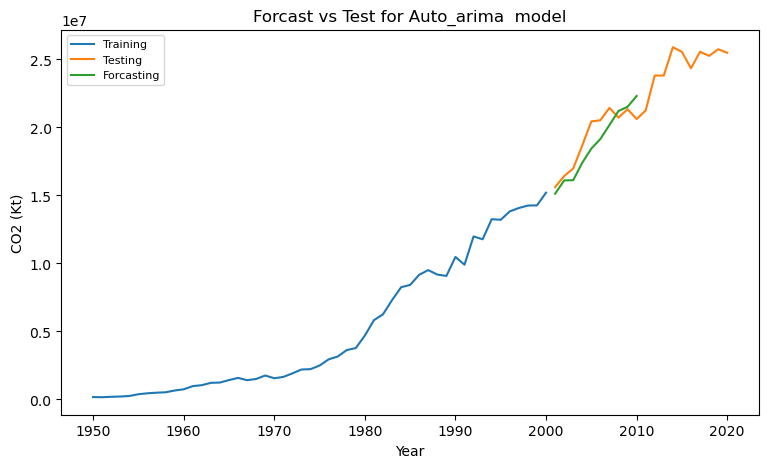

In [39]:
Auto_arima = pm.auto_arima(Train_data,start_p=1, start_q=1,
                           max_p=3, max_q=3, m=12,
                           start_P=0, seasonal=True,
                           d=2, D=1, trace=True,
                           error_action='ignore',  
                           suppress_warnings=True, 
                           stepwise=True)
y_pred1 = Auto_arima.predict(start=Test_data.index.min(), end=Test_data.index.max())
print (Get_Evaluation(Test_data[:10], y_pred1))
plt_pred(y_pred1,'Auto_arima()')

## B.2) Optimal ARIMA model

In [22]:
params = [(p_value, d_value, q_value) for p_value in range(1, 4) for d_value in range(1, 4) for q_value in range(1, 4)]
r = []
o = []
for orders in params:
    model_test = ARIMA(Train_data, order=orders).fit()
    y_pred = model_test.forecast(len(Test_data))
    rmse= mean_squared_error(Test_data, y_pred, squared=False)
    r.append(rmse)
    o.append(orders)
    
df8 = pd.DataFrame(list(zip(o, r)),
               columns =['Params', 'RMSE'])
M = df8['Params'][df8['RMSE'].argmin()]
print (df8 , f' \n ARIMA_Orders = {M}' )

       Params          RMSE
0   (1, 1, 1)  3.091802e+06
1   (1, 1, 2)  6.167588e+06
2   (1, 1, 3)  3.734982e+06
3   (1, 2, 1)  3.255189e+06
4   (1, 2, 2)  2.450628e+06
5   (1, 2, 3)  2.594128e+06
6   (1, 3, 1)  1.460025e+06
7   (1, 3, 2)  2.826455e+06
8   (1, 3, 3)  1.895022e+06
9   (2, 1, 1)  5.053442e+06
10  (2, 1, 2)  5.817114e+06
11  (2, 1, 3)  6.132391e+06
12  (2, 2, 1)  3.267395e+06
13  (2, 2, 2)  2.784698e+06
14  (2, 2, 3)  2.671966e+06
15  (2, 3, 1)  2.546822e+06
16  (2, 3, 2)  2.817801e+06
17  (2, 3, 3)  2.179449e+06
18  (3, 1, 1)  5.256847e+06
19  (3, 1, 2)  5.835818e+06
20  (3, 1, 3)  6.023498e+06
21  (3, 2, 1)  2.862537e+06
22  (3, 2, 2)  3.123287e+06
23  (3, 2, 3)  1.565470e+06
24  (3, 3, 1)  2.800205e+06
25  (3, 3, 2)  3.498740e+06
26  (3, 3, 3)  2.640108e+06  
 ARIMA_Orders = (1, 3, 1)


{'r2_score': 0.794, 'rmse': 1460025.075, 'mae': 1460025.075}
None


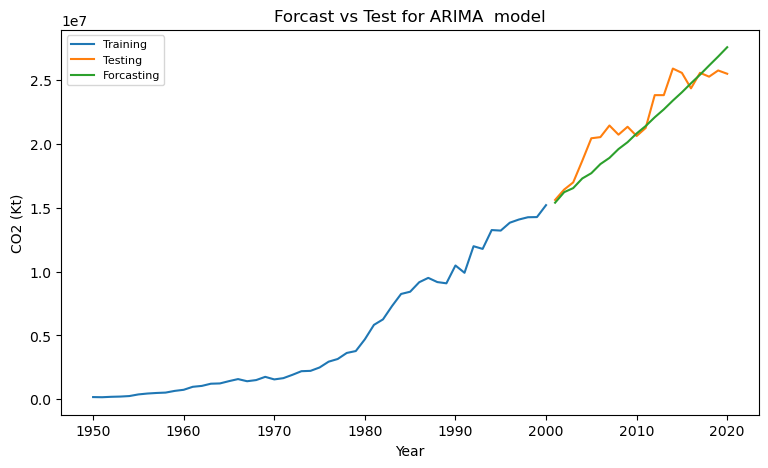

In [23]:
model2= ARIMA(Train_data,order=(1,3,1)).fit()
y_pred2 = model2.forecast(len(Test_data))
print (Get_Evaluation(Test_data, y_pred2))
plt_pred(y_pred2,'ARIMA()')

## B.3) Autoregressive model

In [24]:
#Build a function to optimal lag parameter
def AutoReg_Opt_Lag(x,y):
    lis = range(1, 25)
    r = []
    l = []
    for lag in lis:
        model_test = AutoReg(x, lag).fit()
        y_pred = model_test.forecast(len(y))
        rmse= mean_squared_error(y, y_pred, squared=False)
        r.append(rmse)
        l.append(lag)

    Lag_List = pd.DataFrame(list(zip(l, r)),
                   columns =['Params', 'RMSE'])
    M = Lag_List['Params'][Lag_List['RMSE'].argmin()]
    print (Lag_List , f' \n AutoReg Lag = {M}' )

In [25]:
AutoReg_Opt_Lag(Train_data,Test_data)

    Params          RMSE
0        1  2.217718e+06
1        2  2.379486e+06
2        3  1.672151e+06
3        4  1.750011e+06
4        5  1.663465e+06
5        6  2.600554e+06
6        7  2.955173e+06
7        8  2.527897e+06
8        9  1.390266e+06
9       10  1.288068e+06
10      11  1.837183e+06
11      12  1.796922e+06
12      13  1.396932e+06
13      14  1.359632e+07
14      15  1.566981e+07
15      16  2.402373e+07
16      17  2.872453e+07
17      18  2.693268e+07
18      19  1.739024e+07
19      20  9.130524e+07
20      21  3.567823e+07
21      22  2.063566e+09
22      23  7.023315e+10
23      24  7.058998e+10  
 AutoReg Lag = 10


{'r2_score': 0.84, 'rmse': 1288068.206, 'mae': 1288068.206}
None


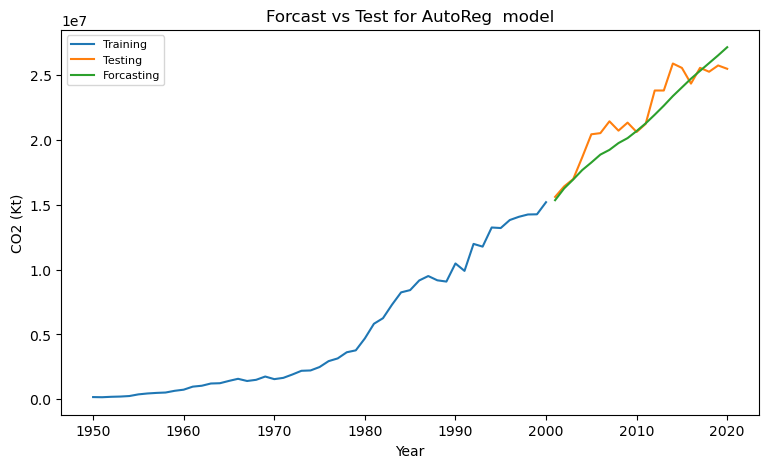

In [26]:
model3 = AutoReg(Train_data, 10).fit()
y_pred = model3.forecast(len(Test_data))
print (Get_Evaluation(Test_data, y_pred))
plt_pred(y_pred,'AutoReg()')

### The model was selected based on the higher accuracy and has a minimum Error, so the "Autoregressive model" is the most optimal model for forecasting

## Final model that Selected

In [27]:
AutoReg_Opt_Lag(df_Forcast,df_Forcast)

    Params          RMSE
0        1  4.236427e+07
1        2  4.481584e+07
2        3  4.029146e+07
3        4  3.761336e+07
4        5  4.347312e+07
5        6  4.500495e+07
6        7  4.463743e+07
7        8  4.165610e+07
8        9  3.590745e+07
9       10  3.442086e+07
10      11  2.903660e+07
11      12  2.717563e+07
12      13  2.217941e+07
13      14  2.148039e+07
14      15  1.876210e+07
15      16  1.829642e+07
16      17  3.332248e+07
17      18  3.676202e+07
18      19  2.959383e+07
19      20  3.623897e+07
20      21  1.146891e+08
21      22  1.139678e+08
22      23  9.387653e+07
23      24  8.899428e+07  
 AutoReg Lag = 16


{'r2_score': 0.994, 'rmse': 614627.628, 'mae': 614627.628}
None


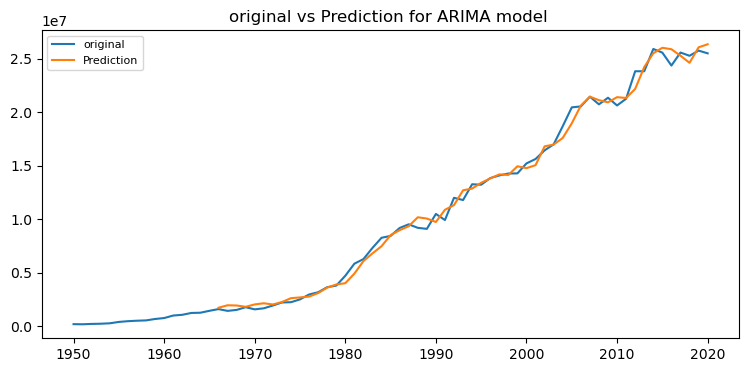

In [28]:
final_model= AutoReg(df_Forcast, 16).fit()
y_pred_f2 = final_model.predict(start=df_Forcast.index.min(), end=df_Forcast.index.max())
plt.figure(figsize=(9,4))
print (Get_Evaluation(df_Forcast[16:], y_pred_f2[16:]))
plt.plot(df_Forcast, label='original')
#plt.plot(test, label='actual')
plt.plot(y_pred_f2, label='Prediction')
plt.title('original vs Prediction for ARIMA model ')
plt.legend(loc='upper left', fontsize=8)
plt.show()

In [29]:
final_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            AutoReg Model Results                             
==============================================================================
Dep. Variable:           CO2 per year   No. Observations:                   71
Model:                    AutoReg(16)   Log Likelihood                -811.124
Method:               Conditional MLE   S.D. of innovations         614627.628
Date:                Tue, 21 Mar 2023   AIC                           1658.248
Time:                        19:51:12   BIC                           1694.380
Sample:                    01-01-1966   HQIC                          1672.221
                         - 01-01-2020                                         
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const             3.082e+05   1.96e+05      1.570      0.116   -7.65e+04    6.93e+05
CO2 per year.L1      0.7533      0.142      5.307      0.000       0.475       1.031
CO2 per year.L2      0.5116      0.175      2.932      0.003       0.170       0.854
CO2 per year.L3     -0.2160      0.198     -1.090      0.276      -0.604       0.172
CO2 per year.L4     -0.3588      0.201     -1.787      0.074      -0.752       0.035
CO2 per year.L5      0.1718      0.240      0.715      0.475      -0.299       0.643
CO2 per year.L6      0.1803      0.242      0.744      0.457      -0.295       0.655
CO2 per year.L7      0.1856      0.258      0.719      0.472      -0.320       0.692
CO2 per year.L8     -0.0493      0.257     -0.192      0.848      -0.552       0.454
CO2 per year.L9     -0.1193      0.265     -0.450      0.653      -0.639       0.401
CO2 per year.L10     0.0993      0.272      0.365      0.715      -0.434       0.633
CO2 per year.L11    -0.1707      0.302     -0.566      0.571      -0.762       0.420
CO2 per year.L12     0.3010      0.304      0.991      0.322      -0.294       0.896
CO2 per year.L13     0.0205      0.305      0.067      0.946      -0.577       0.618
CO2 per year.L14    -0.4459      0.306     -1.456      0.145      -1.046       0.154
CO2 per year.L15     0.0381      0.270      0.141      0.888      -0.492       0.568
CO2 per year.L16     0.0797      0.229      0.348      0.728      -0.369       0.528
                                    Roots                                     
==============================================================================
                   Real          Imaginary           Modulus         Frequency
------------------------------------------------------------------------------
AR.1             1.0071           -0.0415j            1.0080           -0.0066
AR.2             1.0071           +0.0415j            1.0080            0.0066
AR.3             0.8556           -0.5953j            1.0423           -0.0967
AR.4             0.8556           +0.5953j            1.0423            0.0967
AR.5             0.6057           -0.8769j            1.0657           -0.1538
AR.6             0.6057           +0.8769j            1.0657            0.1538
AR.7             0.0397           -1.1022j            1.1029           -0.2443
AR.8             0.0397           +1.1022j            1.1029            0.2443
AR.9             1.9413           -0.0000j            1.9413           -0.0000
AR.10           -0.4609           -0.9527j            1.0584           -0.3217
AR.11           -0.4609           +0.9527j            1.0584            0.3217
AR.12           -0.8422           -0.5986j            1.0333           -0.4017
AR.13           -0.8422           +0.5986j            1.0333            0.4017
AR.14           -1.1831           -0.1977j            1.1995           -0.4736
AR.15           -1.1831           +0.1977j            1.1995            0.4736
AR.16           -2.4633           -0.000

## Creat a dataframe for future

In [30]:
#Forecasting for  next 5 years
futures=[df_Forcast.index[-1]+ DateOffset(years=x)for x in range(0,6)]
future_df5=pd.DataFrame(index=futures[1:],columns=df_Forcast.columns)
future_df5

,CO2 per year
2021-01-01,NaN
2022-01-01,NaN
2023-01-01,NaN
2024-01-01,NaN
2025-01-01,NaN


In [31]:
# Make prediction for 5 years
future_df5['CO2 per year'] = final_model.predict(start=71, end=76)
future_df5

,CO2 per year
2021-01-01,2.592448e+07
2022-01-01,2.625621e+07
2023-01-01,2.582724e+07
2024-01-01,2.730772e+07
2025-01-01,2.745187e+07


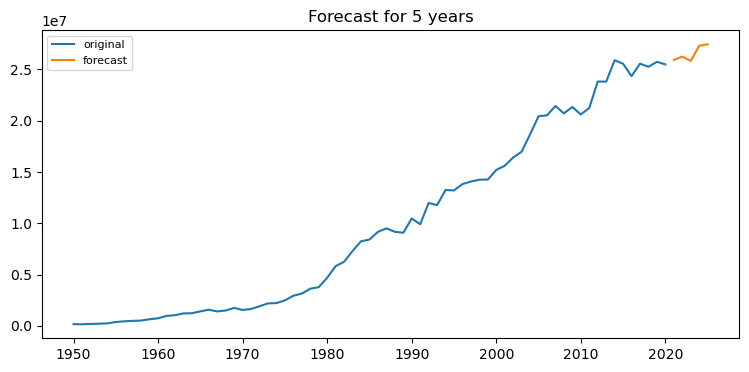

In [32]:
#Plot the forcasting dataset with original dataset for 5 years
plt.figure(figsize=(9,4), dpi=100)
plt.plot(df_Forcast, label='original')
plt.plot(future_df5['CO2 per year'], label='forecast')
plt.title('Forecast for 5 years')
plt.legend(loc='upper left', fontsize=8)
plt.show()

In [33]:
#Forecasting for next 10 years
futures=[df_Forcast.index[-1]+ DateOffset(years=x)for x in range(0,11)]
future_df10=pd.DataFrame(index=futures[1:],columns=df_Forcast.columns)
future_df10

,CO2 per year
2021-01-01,NaN
2022-01-01,NaN
2023-01-01,NaN
2024-01-01,NaN
2025-01-01,NaN
2026-01-01,NaN
2027-01-01,NaN
2028-01-01,NaN
2029-01-01,NaN
2030-01-01,NaN


In [34]:
# Make prediction for 10 years
future_df10['CO2 per year'] = final_model.predict(start=71, end=81)
future_df10

,CO2 per year
2021-01-01,2.592448e+07
2022-01-01,2.625621e+07
2023-01-01,2.582724e+07
2024-01-01,2.730772e+07
2025-01-01,2.745187e+07
2026-01-01,2.766499e+07
2027-01-01,2.824969e+07
2028-01-01,2.692671e+07
2029-01-01,2.705048e+07
2030-01-01,2.692604e+07


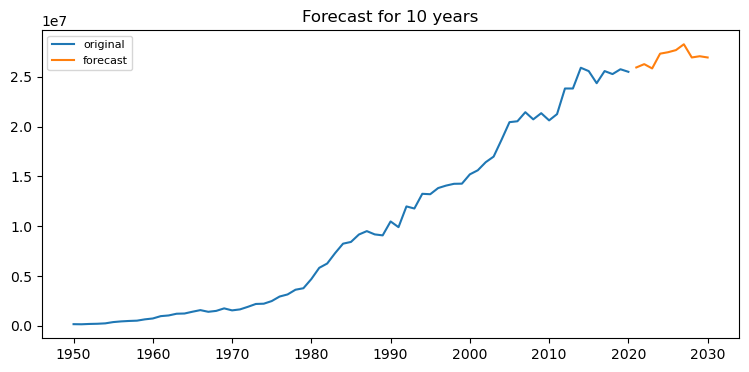

In [35]:
#Plot the forcasting dataset with original dataset for 5 years
plt.figure(figsize=(9,4), dpi=100)
plt.plot(df_Forcast, label='original')
plt.plot(future_df10['CO2 per year'], label='forecast')
plt.title('Forecast for 10 years')
plt.legend(loc='upper left', fontsize=8)
plt.show()

In [36]:
#Save the model on pickel for deployment
model = pickle.dump(final_model,open('arima.pkl', 'wb'))